In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

# identifier: 'sessionID', 'userID'

# continous: 'TARGET'(dependent), 'quality', 'duration', 'transaction', 'transaction_revenue'

# category: 'browser', 'OS', 'device', 'country','continent', 'subcontinent', 'traffic_source', 'traffic_medium', 'keyword', 'referral_path'
# binary: 'new','bounced'

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


# Pre-processing

In [4]:
# drop columns with missing values: 'referral_path','keyword'
x_train =  train_df.drop(['TARGET','sessionID','userID'], axis=1)
y_train = train_df['TARGET']
test_df= test_df.drop(['sessionID','userID'],axis=1)

## Grouping: traffic_source

In [5]:
cols = ['google', 'youtube', 'baidu', 'facebook', 'yahoo', 'bing', 'quora', 'quiita', 'Partners', 'reddit']

# test
for col in cols:
    x_train.loc[x_train['traffic_source'].str.contains(col), 'traffic_source'] = col

# train 
for col in cols:
    test_df.loc[test_df['traffic_source'].str.contains(col), 'traffic_source'] = col

In [6]:
counts = x_train['traffic_source'].value_counts()
for value, count in counts.items():
    print(f"{value}: {count}")

google: 129283
(direct): 59026
youtube: 52876
Partners: 5369
facebook: 747
bing: 704
reddit: 683
qiita.com: 548
quora: 503
baidu: 474
dfa: 436
away.vk.com: 379
yahoo: 301
blog.golang.org: 186
dealspotr.com: 93
lunametrics.com: 81
duckduckgo.com: 75
t.co: 64
linkedin.com: 45
sashihara.jp: 44
int.search.tb.ask.com: 39
aulagrado.esic.edu: 36
outlook.live.com: 31
online-metrics.com: 26
ask: 25
pinterest.com: 21
l.messenger.com: 17
phandroid.com: 17
learn.pct.edu: 16
msn.com: 15
myasucourses.asu.edu: 11
vk.com: 11
arstechnica.com: 8
github.com: 7
r.search.aol.com: 7
bluequill.franklin.edu: 6
s0.2mdn.net: 6
gophergala.com: 6
search.xfinity.com: 5
evernote.com: 4
web.whatsapp.com: 4
search.tb.ask.com: 3
startpage.com: 3
businessinsider.com: 3
search.1and1.com: 3
it.pinterest.com: 3
online.fullsail.edu: 3
learn.colorado.edu: 3
go.mail.ru: 2
wikihow.com: 2
search.mysearch.com: 2
chatwork.com: 2
blackboard.bentley.edu: 2
kik.com: 2
getpocket.com: 2
lisham-web.blogspot.com: 1
search.snapdo.com: 1

## New Category: 'others'

In [7]:
cols = ['browser', 'OS', 'subcontinent', 'traffic_source']

threshold = 100

for col in cols:
    x_train[col] = x_train[col].where(x_train[col].map(x_train[col].value_counts()) >= threshold, 'others')
    
for col in cols:
    test_df[col] = test_df[col].where(test_df[col].map(test_df[col].value_counts()) >= threshold, 'others')

## keyword 및 refferal_path 처리

In [8]:
import re

def extract_category(keyword):
    if isinstance(keyword, str):
        match = re.search(r'Category\d+', keyword)
        if match:
            return match.group(0)
    return keyword

x_train['keyword'] = x_train['keyword'].apply(extract_category)
x_train['keyword'] = x_train['keyword'].fillna('others')
x_train['keyword'].unique()

test_df['keyword'] = test_df['keyword'].apply(extract_category)
test_df['keyword'] = test_df['keyword'].fillna('others')

In [9]:
x_train['referral_path'] = x_train['referral_path'].apply(extract_category)
x_train['referral_path'] = x_train['referral_path'].fillna('Others')
x_train['referral_path'].unique()

array(['Others', 'Category6', 'Category7', 'Category5', 'Category11',
       'Category8', 'Category9', 'Category13', 'Category1', 'Category2',
       'Category3', 'Category4', 'Category12', 'Category10'], dtype=object)

In [10]:
test_df['referral_path'] = test_df['referral_path'].apply(extract_category)
test_df['referral_path'] = test_df['referral_path'].fillna('Others')
test_df['referral_path'].unique()

array(['Category1', 'Others', 'Category2', 'Category11', 'Category3',
       'Category10', 'Category6', 'Category8', 'Category5', 'Category12',
       'Category13', 'Category7', 'Category9', 'Category4'], dtype=object)

In [11]:
test_df.head()

,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),others,Category1
1,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,Others
2,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube,referral,others,Category2
3,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,Others
4,Internet Explorer,others,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube,referral,others,Category11


## Encoding

In [12]:
# oneHotEncoder vs binaryEncoder

from sklearn.preprocessing import OneHotEncoder  

categories = ['browser', 'OS', 'device', 'country','continent', 'subcontinent', 'traffic_source', 'traffic_medium', 'referral_path', 'keyword']

encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')   # drop = 'first'

train_encoded_df = pd.DataFrame(encoder.fit_transform(x_train[categories]) , columns=encoder.get_feature_names_out(categories))
display(train_encoded_df.head())

try :
    test_encoded_df = pd.DataFrame(encoder.transform(test_df[categories]), columns=encoder.get_feature_names_out(categories))
    display(test_encoded_df.head())

except Exception as e:
    print(f"Error : {e}")

C:\Users\taeho\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category12,keyword_Category2,keyword_Category3,keyword_Category4,keyword_Category5,keyword_Category6,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category12,keyword_Category2,keyword_Category3,keyword_Category4,keyword_Category5,keyword_Category6,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## z-score normalization

In [13]:
from sklearn.preprocessing import StandardScaler

continuous_col = ['quality', 'duration', 'transaction', 'transaction_revenue']

# train
scaler = StandardScaler()
train_scaled_df = pd.DataFrame(scaler.fit_transform(x_train[continuous_col]), index=x_train.index, columns=continuous_col)
display(train_scaled_df.head())

# test
test_scaled_df = pd.DataFrame(scaler.transform(test_df[continuous_col]), index=test_df.index, columns=continuous_col)
display(test_scaled_df.head())

,quality,duration,transaction,transaction_revenue
0,3.713206,2.193865,-0.089494,-0.042587
1,-0.253972,-0.223964,-0.089494,-0.042587
2,-0.253972,-0.341833,-0.089494,-0.042587
3,-0.253972,-0.341833,-0.089494,-0.042587
4,-0.253972,-0.341833,-0.089494,-0.042587


,quality,duration,transaction,transaction_revenue
0,6.418101,1.767722,-0.089494,-0.042587
1,-0.253972,-0.341833,-0.089494,-0.042587
2,-0.253972,-0.242098,-0.089494,-0.042587
3,-0.253972,-0.112140,-0.089494,-0.042587
4,-0.163809,0.782457,-0.089494,-0.042587


## Final Dataset

In [14]:
# merge all selected columns
x_train_fin = pd.concat([train_encoded_df, train_scaled_df,  train_df[['bounced', 'new']]], axis=1)
display(x_train_fin.head())

x_test_fin = pd.concat([test_encoded_df, test_scaled_df,  test_df[['bounced', 'new']]], axis=1)
display(x_test_fin.head())

,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others,quality,duration,transaction,transaction_revenue,bounced,new
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,3.713206,2.193865,-0.089494,-0.042587,0,0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.223964,-0.089494,-0.042587,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,1
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.341833,-0.089494,-0.042587,1,0


,browser_Amazon Silk,browser_Android Browser,browser_Android Webview,browser_Chrome,browser_Coc Coc,browser_Edge,browser_Firefox,browser_Internet Explorer,browser_Mozilla Compatible Agent,browser_Opera,...,keyword_Category7,keyword_Category8,keyword_Category9,keyword_others,quality,duration,transaction,transaction_revenue,bounced,new
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.418101,1.767722,-0.089494,-0.042587,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.341833,-0.089494,-0.042587,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.253972,-0.242098,-0.089494,-0.042587,0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.253972,-0.112140,-0.089494,-0.042587,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.163809,0.782457,-0.089494,-0.042587,0,1


In [15]:
# 비율 및 비율 변환
x_train_fin['avg_transaction_revenue'] = x_train_fin['transaction_revenue'] / x_train_fin['transaction']
x_test_fin['avg_transaction_revenue'] = x_test_fin['transaction_revenue'] / x_test_fin['transaction']

# 합산 및 차분
x_train_fin['total_engagement'] = x_train_fin['quality'] + x_train_fin['duration'] + x_train_fin['transaction']
x_test_fin['total_engagement'] = x_test_fin['quality'] + x_test_fin['duration'] + x_test_fin['transaction']

# 상호작용 및 다항식 생성
x_train_fin['quality_duration_interaction'] = x_train_fin['quality'] * x_train_fin['duration']
x_test_fin['quality_duration_interaction'] = x_test_fin['quality'] * x_test_fin['duration']

# 추가 변수 생성
x_train_fin['quality_div_duration'] = x_train_fin['quality'] / x_train_fin['duration']
x_test_fin['quality_div_duration'] = x_test_fin['quality'] / x_test_fin['duration']

x_train_fin['quality_squared'] = x_train_fin['quality'] ** 2
x_test_fin['quality_squared'] = x_test_fin['quality'] ** 2

x_train_fin['duration_mul_quality'] = x_train_fin['duration'] * x_train_fin['quality']
x_test_fin['duration_mul_quality'] = x_test_fin['duration'] * x_test_fin['quality']

# 추가적인 변수 조합
x_train_fin['engagement_div_transaction'] = x_train_fin['total_engagement'] / x_train_fin['transaction']
x_test_fin['engagement_div_transaction'] = x_test_fin['total_engagement'] / x_test_fin['transaction']

x_train_fin['quality_div_transaction'] = x_train_fin['quality'] / x_train_fin['transaction']
x_test_fin['quality_div_transaction'] = x_test_fin['quality'] / x_test_fin['transaction']

# 추가적인 변수 조합
x_train_fin['duration_mul_transaction'] = x_train_fin['duration'] * x_train_fin['transaction']
x_test_fin['duration_mul_transaction'] = x_test_fin['duration'] * x_test_fin['transaction']

x_train_fin['duration_div_quality'] = x_train_fin['duration'] / x_train_fin['quality']
x_test_fin['duration_div_quality'] = x_test_fin['duration'] / x_test_fin['quality']

x_train_fin['quality_mul_transaction'] = x_train_fin['quality'] * x_train_fin['transaction']
x_test_fin['quality_mul_transaction'] = x_test_fin['quality'] * x_test_fin['transaction']

x_train_fin['transaction_div_duration'] = x_train_fin['transaction'] / x_train_fin['duration']
x_test_fin['transaction_div_duration'] = x_test_fin['transaction'] / x_test_fin['duration']

# 추가적인 변수 조합
x_train_fin['duration_squared'] = x_train_fin['duration'] ** 2
x_test_fin['duration_squared'] = x_test_fin['duration'] ** 2

x_train_fin['quality_div_total_engagement'] = x_train_fin['quality'] / x_train_fin['total_engagement']
x_test_fin['quality_div_total_engagement'] = x_test_fin['quality'] / x_test_fin['total_engagement']

x_train_fin['transaction_div_total_engagement'] = x_train_fin['transaction'] / x_train_fin['total_engagement']
x_test_fin['transaction_div_total_engagement'] = x_test_fin['transaction'] / x_test_fin['total_engagement']

x_train_fin['total_engagement_mul_duration'] = x_train_fin['total_engagement'] * x_train_fin['duration']
x_test_fin['total_engagement_mul_duration'] = x_test_fin['total_engagement'] * x_test_fin['duration']

x_train_fin['quality_duration_div_transaction'] = (x_train_fin['quality'] * x_train_fin['duration']) / x_train_fin['transaction']
x_test_fin['quality_duration_div_transaction'] = (x_test_fin['quality'] * x_test_fin['duration']) / x_test_fin['transaction']

# 새로운 변수 추가 (5개)
x_train_fin['duration_div_transaction'] = x_train_fin['duration'] / x_train_fin['transaction']
x_test_fin['duration_div_transaction'] = x_test_fin['duration'] / x_test_fin['transaction']

x_train_fin['transaction_div_quality'] = x_train_fin['transaction'] / x_train_fin['quality']
x_test_fin['transaction_div_quality'] = x_test_fin['transaction'] / x_test_fin['quality']

x_train_fin['total_engagement_div_duration'] = x_train_fin['total_engagement'] / x_train_fin['duration']
x_test_fin['total_engagement_div_duration'] = x_test_fin['total_engagement'] / x_test_fin['duration']

x_train_fin['total_engagement_div_quality'] = x_train_fin['total_engagement'] / x_train_fin['quality']
x_test_fin['total_engagement_div_quality'] = x_test_fin['total_engagement'] / x_test_fin['quality']

x_train_fin['total_engagement_mul_quality'] = x_train_fin['total_engagement'] * x_train_fin['quality']
x_test_fin['total_engagement_mul_quality'] = x_test_fin['total_engagement'] * x_test_fin['quality']


In [16]:
x_train_fin.columns

Index(['browser_Amazon Silk', 'browser_Android Browser',
       'browser_Android Webview', 'browser_Chrome', 'browser_Coc Coc',
       'browser_Edge', 'browser_Firefox', 'browser_Internet Explorer',
       'browser_Mozilla Compatible Agent', 'browser_Opera',
       ...
       'duration_squared', 'quality_div_total_engagement',
       'transaction_div_total_engagement', 'total_engagement_mul_duration',
       'quality_duration_div_transaction', 'duration_div_transaction',
       'transaction_div_quality', 'total_engagement_div_duration',
       'total_engagement_div_quality', 'total_engagement_mul_quality'],
      dtype='object', length=340)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

# RandomForestRegressor 모델 정의
rf_model = RandomForestRegressor(random_state=2024, n_estimators=100, max_depth=15)

# CatBoostRegressor 모델 정의
catboost_model = CatBoostRegressor(random_state=2024, n_estimators=100, max_depth=10, learning_rate=0.1)

# Base 모델 정의
base_models = [
    ('rf', rf_model),
    ('lgbm', LGBMRegressor(random_state=2024, n_estimators=100, max_depth=20,learning_rate=0.05, min_child_samples=30, num_leaves=40)),
    ('catboost', catboost_model)
]

# 최종 모형 정의 (Stacking)
final_model = LGBMRegressor(random_state=2024, n_estimators=100, max_depth=20, learning_rate=0.05, num_leaves=40, min_child_samples=30)

# Stacking 모델 정의
model = StackingRegressor(estimators=base_models, final_estimator=final_model)

# Stacking 모델 학습
model.fit(x_train_fin, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5971
[LightGBM] [Info] Number of data points in the train set: 252289, number of used features: 260
[LightGBM] [Info] Start training from score 3.592626
0:	learn: 5.1403863	total: 244ms	remaining: 24.1s
1:	learn: 4.8203033	total: 345ms	remaining: 16.9s
2:	learn: 4.5330957	total: 449ms	remaining: 14.5s
3:	learn: 4.2839633	total: 559ms	remaining: 13.4s
4:	learn: 4.0674832	total: 667ms	remaining: 12.7s
5:	learn: 3.8830944	total: 773ms	remaining: 12.1s
6:	learn: 3.7189180	total: 878ms	remaining: 11.7s
7:	learn: 3.5757228	total: 987ms	remaining: 11.4s
8:	learn: 3.4604167	total: 1.09s	remaining: 11s
9:	learn: 3.3539939	total: 1.19s	remaining: 10.8s
10:	learn: 3.2596051	total: 1.3s	remaining: 10.5s
11:	learn: 3.1813326	total: 

13:	learn: 2.9816564	total: 1.56s	remaining: 9.58s
14:	learn: 2.9274642	total: 1.66s	remaining: 9.41s
15:	learn: 2.8832541	total: 1.76s	remaining: 9.24s
16:	learn: 2.8384020	total: 1.86s	remaining: 9.1s
17:	learn: 2.8063570	total: 1.96s	remaining: 8.95s
18:	learn: 2.7764221	total: 2.07s	remaining: 8.82s
19:	learn: 2.7489442	total: 2.17s	remaining: 8.68s
20:	learn: 2.7188008	total: 2.27s	remaining: 8.54s
21:	learn: 2.6950847	total: 2.37s	remaining: 8.41s
22:	learn: 2.6751572	total: 2.47s	remaining: 8.29s
23:	learn: 2.6588857	total: 2.58s	remaining: 8.15s
24:	learn: 2.6446373	total: 2.67s	remaining: 8.02s
25:	learn: 2.6334032	total: 2.78s	remaining: 7.91s
26:	learn: 2.6190122	total: 2.88s	remaining: 7.79s
27:	learn: 2.6101924	total: 2.98s	remaining: 7.66s
28:	learn: 2.5962024	total: 3.09s	remaining: 7.57s
29:	learn: 2.5856663	total: 3.2s	remaining: 7.47s
30:	learn: 2.5774173	total: 3.31s	remaining: 7.36s
31:	learn: 2.5684243	total: 3.41s	remaining: 7.25s
32:	learn: 2.5623191	total: 3.51s

76:	learn: 2.4384546	total: 7.86s	remaining: 2.35s
77:	learn: 2.4337912	total: 7.98s	remaining: 2.25s
78:	learn: 2.4322240	total: 8.11s	remaining: 2.15s
79:	learn: 2.4304284	total: 8.22s	remaining: 2.06s
80:	learn: 2.4250150	total: 8.34s	remaining: 1.96s
81:	learn: 2.4203213	total: 8.44s	remaining: 1.85s
82:	learn: 2.4185479	total: 8.52s	remaining: 1.75s
83:	learn: 2.4154774	total: 8.62s	remaining: 1.64s
84:	learn: 2.4103702	total: 8.71s	remaining: 1.54s
85:	learn: 2.4074879	total: 8.81s	remaining: 1.43s
86:	learn: 2.4046883	total: 8.9s	remaining: 1.33s
87:	learn: 2.3992607	total: 8.99s	remaining: 1.23s
88:	learn: 2.3981894	total: 9.09s	remaining: 1.12s
89:	learn: 2.3956079	total: 9.19s	remaining: 1.02s
90:	learn: 2.3914028	total: 9.29s	remaining: 918ms
91:	learn: 2.3897991	total: 9.38s	remaining: 815ms
92:	learn: 2.3884336	total: 9.47s	remaining: 713ms
93:	learn: 2.3861510	total: 9.56s	remaining: 610ms
94:	learn: 2.3835889	total: 9.67s	remaining: 509ms
95:	learn: 2.3827109	total: 9.77

39:	learn: 2.5015202	total: 4.22s	remaining: 6.33s
40:	learn: 2.4943085	total: 4.32s	remaining: 6.22s
41:	learn: 2.4860951	total: 4.43s	remaining: 6.11s
42:	learn: 2.4797687	total: 4.53s	remaining: 6.01s
43:	learn: 2.4713057	total: 4.64s	remaining: 5.9s
44:	learn: 2.4681652	total: 4.74s	remaining: 5.79s
45:	learn: 2.4640254	total: 4.84s	remaining: 5.69s
46:	learn: 2.4590001	total: 4.95s	remaining: 5.58s
47:	learn: 2.4564097	total: 5.05s	remaining: 5.47s
48:	learn: 2.4517957	total: 5.16s	remaining: 5.37s
49:	learn: 2.4477938	total: 5.25s	remaining: 5.25s
50:	learn: 2.4422133	total: 5.36s	remaining: 5.15s
51:	learn: 2.4372657	total: 5.47s	remaining: 5.05s
52:	learn: 2.4341605	total: 5.59s	remaining: 4.96s
53:	learn: 2.4307571	total: 5.69s	remaining: 4.85s
54:	learn: 2.4252564	total: 5.8s	remaining: 4.74s
55:	learn: 2.4215825	total: 5.9s	remaining: 4.63s
56:	learn: 2.4153731	total: 6s	remaining: 4.53s
57:	learn: 2.4128942	total: 6.11s	remaining: 4.42s
58:	learn: 2.4095572	total: 6.21s	rem

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     random_state=2024)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.05, max_depth=20,
                                             min_child_samples=30,
                                             num_leaves=40,
                                             random_state=2024)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x000002021BE34150>)],
                  final_estimator=LGBMRegressor(learning_rate=0.05,
                                                max_depth=20,
                                                min_child_samples=30,
                                                num_leaves=40,
                                                random_state=2024))

In [18]:
model

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     random_state=2024)),
                              ('lgbm',
                               LGBMRegressor(learning_rate=0.05, max_depth=20,
                                             min_child_samples=30,
                                             num_leaves=40,
                                             random_state=2024)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x000002021BE34150>)],
                  final_estimator=LGBMRegressor(learning_rate=0.05,
                                                max_depth=20,
                                                min_child_samples=30,
                                                num_leaves=40,
                                                random_state=2024))

In [19]:
y_train

0         17.0
1          3.0
2          1.0
3          1.0
4          1.0
          ... 
252284     1.0
252285     1.0
252286     5.0
252287     1.0
252288     6.0
Name: TARGET, Length: 252289, dtype: float64

In [20]:
# 테스트 세트에 대한 예측 수행
y_pred = model.predict(x_test_fin)

In [21]:
y_pred

array([25.54987353,  1.01819469,  2.74252236, ...,  2.53157554,
        4.70686842,  1.01819469])

In [22]:
submit = pd.read_csv("sample_submission.csv")

In [23]:
submit['TARGET'] =y_pred
submit

,sessionID,TARGET
0,SESSION_252289,25.549874
1,SESSION_252290,1.018195
2,SESSION_252291,2.742522
3,SESSION_252292,4.288559
4,SESSION_252293,8.945921
...,...,...
79781,SESSION_332070,1.018195
79782,SESSION_332071,1.018195
79783,SESSION_332072,2.531576
79784,SESSION_332073,4.706868


In [24]:
submit.to_csv('stacking11.csv', index=False)

## PCA

Text(0, 0.5, 'Explained variance (%)')

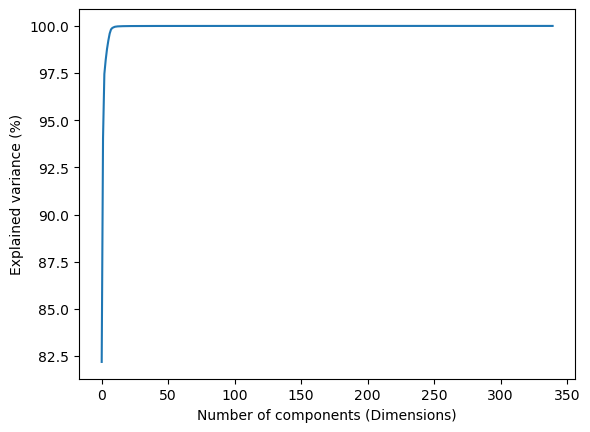

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None, random_state=375)

pca.fit(x_train_fin)

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [106]:
missing_values_count = x_train_fin.isnull().sum()
missing_variables = missing_values_count[missing_values_count > 0].index.tolist()
print("Variables with missing values:", missing_variables)


Variables with missing values: ['transaction_sqrt']
